[(<datastructure.LocationNode object at 0x7fe0383c3390>, <datastructure.LocationNode object at 0x7fe0383bb6d0>, 0)]


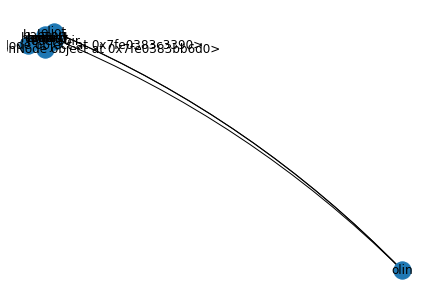

In [1]:
import networkx as nx
from datastructure import LocationNode, TransitEdge, Timing
import matplotlib.pyplot as plt
import json

with open('map.json') as f:
    data = json.load(f)

G = nx.MultiDiGraph()

for i in data['places']:
    G.add_node(i['name'], node=LocationNode(coords=tuple(i['coords'])))

# G.nodes(data=True)

G.add_edge('olin', 'eliot', path = TransitEdge(calories=100))
G.add_edge('olin', 'eliot', path = TransitEdge(calories=200))
G.add_edge('olin', 'babson', path = TransitEdge(calories=10))

# print(G.edges[olin, eliot, 0]['path'].calories)

# pos = nx.spring_layout(G)
pos = {i:G.nodes[i]['node'].coords for i in nx.get_node_attributes(G, 'node')}


# edge_labels=dict([((u,v,),d['length']) for u,v,d in G.edges(data=True)])
# labels={i:i.name for i in G.nodes()}

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
# nx.draw_networkx_edge_labels(G, pos, label_pos=0.3, font_size=7)

plt.show()